# Model 4: Medal winning over the athlete physical feature evolution.

In [ ]:
"""
loading libraries
"""
import os
import numpy as np 
import pandas as pd
from model4_funcs import * 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In this model, we consider and estimate the trend of some particular physical characteristics such as height, weight and age of the Olympic athletes.   
In particular, we want to outline the physical features that an athlete should have to have a chance of winning a medal in the upcoming years. 

Before presenting the results we briefly discuss:
1. Dataframe cleaning
2. Replacement of nans
3. Description of the analysis
4. Linear Regression model and fit estimation
5. Modelling Sports and Events 
6. Results
7. Who will be the winning athlete of 2050?

## 1. Dataframe cleaning 

After a quick analysis of the dataset, we decided to consider the dataset only for the years after 1960, in fact before this year, many data were missing and even if present, the variance was very high.  
In particular, for a regression model like this, it was essential to have correct data to avoid undesired fluctuations. 
We considered all athletes who had won at least one medal in a discipline. 


In [ ]:
df_olympic = pd.read_csv('data/athlete_events.csv',index_col="ID")
df_noc = pd.read_csv('data/noc_regions.csv')
df = pd.merge(df_olympic, df_noc, on='NOC', how='left')
df = df_olympic.copy()
df_clean= df[df.Year >= 1960]
medal = ["Gold", "Silver","Bronze"]
df_clean = df_clean[df_clean['Medal'].isin(medal)]

In [3]:
df_clean.sample(10)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
104546,Birut akickien (Juoznait-),F,31.0,186.0,80.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Women's Double Sculls,Bronze
58102,Katrin Kauschke,F,20.0,176.0,62.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Women's Hockey,Silver
62738,"Olga Valentinovna Korbut (-Bortkevich, -Voynich)",F,17.0,152.0,39.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Floor Exercise,Gold
118106,Abutaleb Talebi Gorgori,M,23.0,160.0,63.0,Iran,IRI,1968 Summer,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Bronze
129029,Siegmar Wtzlich,M,24.0,175.0,72.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Bronze
4007,Soslan Petrovich Andiyev,M,24.0,194.0,125.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold
55072,Knut Johannesen,M,26.0,183.0,85.0,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 10,000 metres",Gold
89286,Richard Craig Oppel,M,21.0,193.0,91.0,United States,USA,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
82167,Dorothy Sarkis Morkis,F,33.0,172.0,59.0,United States,USA,1976 Summer,1976,Summer,Montreal,Equestrianism,"Equestrianism Mixed Dressage, Team",Bronze


## 2. Replacement of nan

After an initial cleaning, we looked for the possible presence of missing values.  
For example, in the case of medal-winning athletes
with one of the three sizes missing, we replaced it with the average value of that size in that year. 


In [ ]:
df_clean['Age'] = df_clean.groupby(['Year', 'Sport'])['Age'].transform(lambda x: x.fillna(x.mean()))
df_clean['Height'] = df_clean.groupby(['Year', 'Sport'])['Height'].transform(lambda x: x.fillna(x.mean()))
df_clean['Weight'] = df_clean.groupby(['Year', 'Sport'])['Weight'].transform(lambda x: x.fillna(x.mean()))

In [4]:
df_clean.isna().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

## 3. Description of the Analysis

The last step of data preparation is as follows:   
Given a sport and an event, for each year we calculated the mean and variance of the three features considering the athletes who had won at least one medal in that year.   
This allowed us to have a point, for each year, with the height, weight and age of each athlete. 

In [5]:
"""
We have implemented this function to efficiently and quickly filter the 
dataframe according to the characteristics needed for regression. 
"""
data, f = medal_feature(sport = "Swimming" ,event = "Swimming Men's 4 x 100 metres Medley Relay"  ,sex = "M",season = "Summer" ,feature = "Height" ,data= df_clean)

Text(0.5, 1.0, "Swimming Men's 4 x 100 metres Medley Relay")

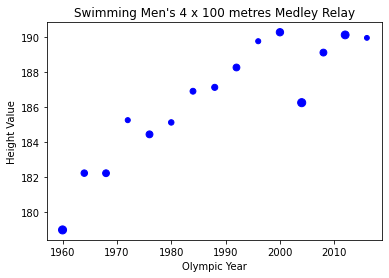

In [7]:
plt.scatter(x, y_true, err, c = 'blue')
plt.xlabel("Olympic Year")
plt.ylabel("Height Value")
plt.title("Swimming Men's 4 x 100 metres Medley Relay")

## 4. Linear Regression model and fit estimation

At this point, we use linear regression to our data.     
Each point represents the mean value of a specific feature and is weighted by its variance. 
The regression_sport function takes as input the filtered data frame and one of the three features. 
This function, also, returns the value of the slope and the intercept of the line that best fits our data. 
R_square parameter indicates (with a value between 0 and 1) how accurate the fit is. 

----------------------------------------
Regression features:
Slope: 0.17
Intercept: -152.64
R_square: 0.81
----------------------------------------


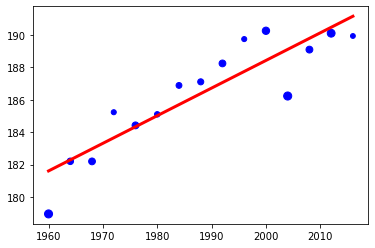

In [6]:
x, y_true, y_pred, err, r_square = regression_sport(data,f)
plt.scatter(x, y_true, err, c = 'blue')
plt.plot(x, y_pred, linewidth=3, markersize=12, c = 'red')


## 5. Modelling sports and events. 

This model was applied to the tops sports and events to outline how important it is to be taller or shorter, thinner or stronger, older or younger.
So, we looked for the sports with the most medals and, for each of them, we considered the most important events. 
This analysis has been done for both men and women and for both the Winter and Summer Olympic Games. 
This will allow us to analyse some sports where our model works well and others where it does not, showing any correlation between sports and features.  

#### Top 4 sport event in the  Winter  Olympic Games for Male.

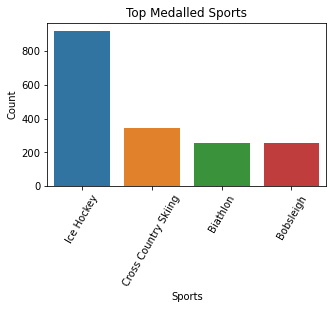

In [8]:
top_sports = top_n_medalled_sport(sex = "M", n = 4, season = "Winter",data = df_clean)

In [9]:
"""
Ice Hockey Men's Ice Hockey has only one event
"""
sports_overview(top_sports,n_events = 4,sex = "M", Season = "Winter")

,Height,Weight,Age
Ice Hockey Men's Ice Hockey,0.921,0.874,0.508
Cross Country Skiing Men's 4 x 10 kilometres Relay,0.492,0.366,0.265
Cross Country Skiing Men's 50 kilometres,0.120,0.046,0.000
Cross Country Skiing Men's 15 kilometres,0.217,0.108,0.049
Cross Country Skiing Men's 30 kilometres,0.391,0.385,0.008
Biathlon Men's 4 x 7.5 kilometres Relay,0.319,0.279,0.245
Biathlon Men's 20 kilometres,0.009,0.047,0.066
Biathlon Men's 10 kilometres Sprint,0.464,0.032,0.414
Biathlon Men's 12.5 kilometres Pursuit,0.145,0.076,0.286
Bobsleigh Men's Four,0.903,0.880,0.109


#### Top 4 sport event in the  Summer  Olympic Games for Male.

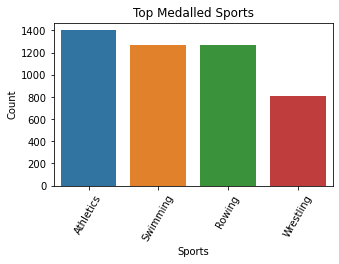

In [10]:
top_sports = top_n_medalled_sport(sex = "M", n = 4, season = "Summer",data = df_clean)

In [11]:
sports_overview(top_sports,n_events = 4,sex = "M", Season = "Summer")

,Height,Weight,Age
Athletics Men's 4 x 400 metres Relay,0.044,0.235,0.098
Athletics Men's 4 x 100 metres Relay,0.352,0.551,0.329
Athletics Men's High Jump,0.004,0.291,0.528
Athletics Men's Pole Vault,0.109,0.188,0.186
Swimming Men's 4 x 100 metres Medley Relay,0.807,0.799,0.693
Swimming Men's 4 x 200 metres Freestyle Relay,0.711,0.664,0.676
Swimming Men's 4 x 100 metres Freestyle Relay,0.779,0.887,0.825
Swimming Men's 100 metres Freestyle,0.635,0.766,0.628
Rowing Men's Coxed Eights,0.832,0.849,0.671
Rowing Men's Coxless Fours,0.696,0.893,0.402


#### Top 4 sport event in the  Winter  Olympic Games for Females.

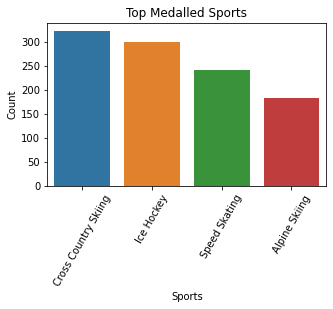

In [12]:
top_sports = top_n_medalled_sport(sex = "F", n = 4, season = "Winter",data = df_clean)

In [13]:
sports_overview(top_sports,n_events = 4,sex = "F", Season = "Winter")

,Height,Weight,Age
Cross Country Skiing Women's 4 x 5 kilometres Relay,0.107,0.197,0.494
Cross Country Skiing Women's 3 x 5 kilometres Relay,0.085,0.350,0.057
Cross Country Skiing Women's 10 kilometres,0.256,0.110,0.012
Cross Country Skiing Women's 5 kilometres,0.649,0.389,0.006
Ice Hockey Women's Ice Hockey,0.330,0.193,0.210
Speed Skating Women's 500 metres,0.412,0.336,0.384
"Speed Skating Women's 1,000 metres",0.194,0.168,0.352
"Speed Skating Women's 3,000 metres",0.390,0.327,0.000
"Speed Skating Women's 1,500 metres",0.264,0.311,0.000
Alpine Skiing Women's Downhill,0.086,0.301,0.662


#### Top 4 sport event in the  Summer  Olympic Games for Females.

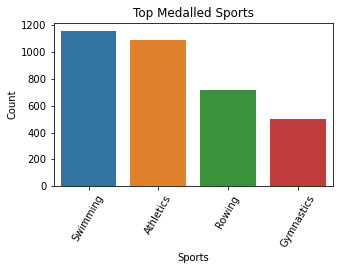

In [14]:
top_sports = top_n_medalled_sport(sex = "F", n = 4, season = "Summer",data = df_clean)

In [15]:
sports_overview(top_sports,n_events = 4,sex = "F", Season = "Summer")

,Height,Weight,Age
Swimming Women's 4 x 100 metres Medley Relay,0.731,0.633,0.815
Swimming Women's 4 x 100 metres Freestyle Relay,0.777,0.537,0.835
Swimming Women's 4 x 200 metres Freestyle Relay,0.005,0.137,0.038
Swimming Women's 100 metres Freestyle,0.289,0.041,0.368
Athletics Women's 4 x 100 metres Relay,0.015,0.211,0.602
Athletics Women's 4 x 400 metres Relay,0.767,0.688,0.552
Athletics Women's High Jump,0.652,0.003,0.338
Athletics Women's 800 metres,0.099,0.122,0.001
Rowing Women's Coxed Eights,0.802,0.009,0.792
Rowing Women's Quadruple Sculls,0.017,0.465,0.367


## 6. Results

In this section, we analyse two men's and women's sports in the winter and summer seasons. 

#### 6.1 Ice Hockey Men's 

Height
----------------------------------------
Regression features:
Slope: 0.15
Intercept: -116.70
R_square: 0.92
----------------------------------------
Weight
----------------------------------------
Regression features:
Slope: 0.24
Intercept: -399.63
R_square: 0.87
----------------------------------------
Age
----------------------------------------
Regression features:
Slope: 0.08
Intercept: -124.16
R_square: 0.51
----------------------------------------


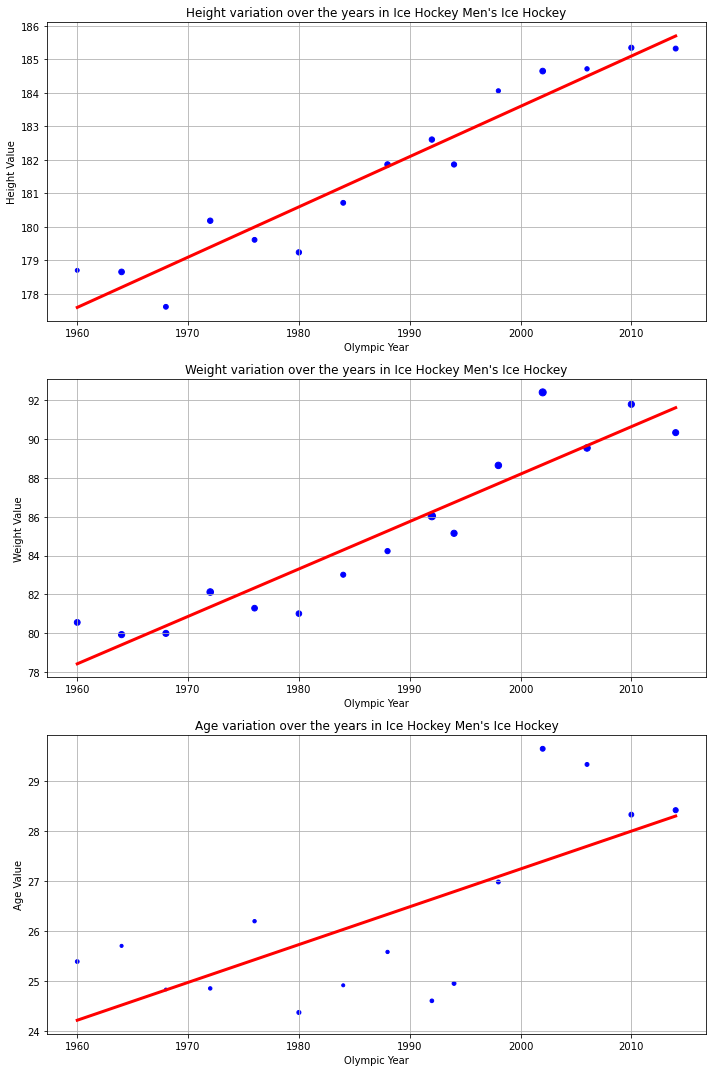

In [16]:
features = ["Height","Weight","Age"]
Event = "Ice Hockey Men's Ice Hockey"
Sex = "M"
Season = "Winter"
Sport = "Ice Hockey"
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, p in enumerate(features):
    print(p)
    data, f = medal_feature(sport = Sport ,event = Event  ,sex = Sex, season = Season ,feature = p ,data= df_clean)
    x, y_true, y_pred, err, r_square = regression_sport(data,f)
    axs[i].scatter(x, y_true, err, c = 'blue')
    axs[i].plot(x, y_pred, linewidth=3, markersize=12, c = 'red')
    axs[i].set_xlabel("Olympic Year")
    axs[i].set_ylabel(str(p)+ " Value")
    axs[i].set_title(str(p) + " variation over the years in " + str(Event))
    fig.tight_layout()
    axs[i].grid()


#### 6.2 Rowing Men's Coxed Eights

Height
----------------------------------------
Regression features:
Slope: 0.16
Intercept: -124.07
R_square: 0.83
----------------------------------------
Weight
----------------------------------------
Regression features:
Slope: 0.19
Intercept: -283.43
R_square: 0.85
----------------------------------------
Age
----------------------------------------
Regression features:
Slope: 0.07
Intercept: -121.74
R_square: 0.67
----------------------------------------


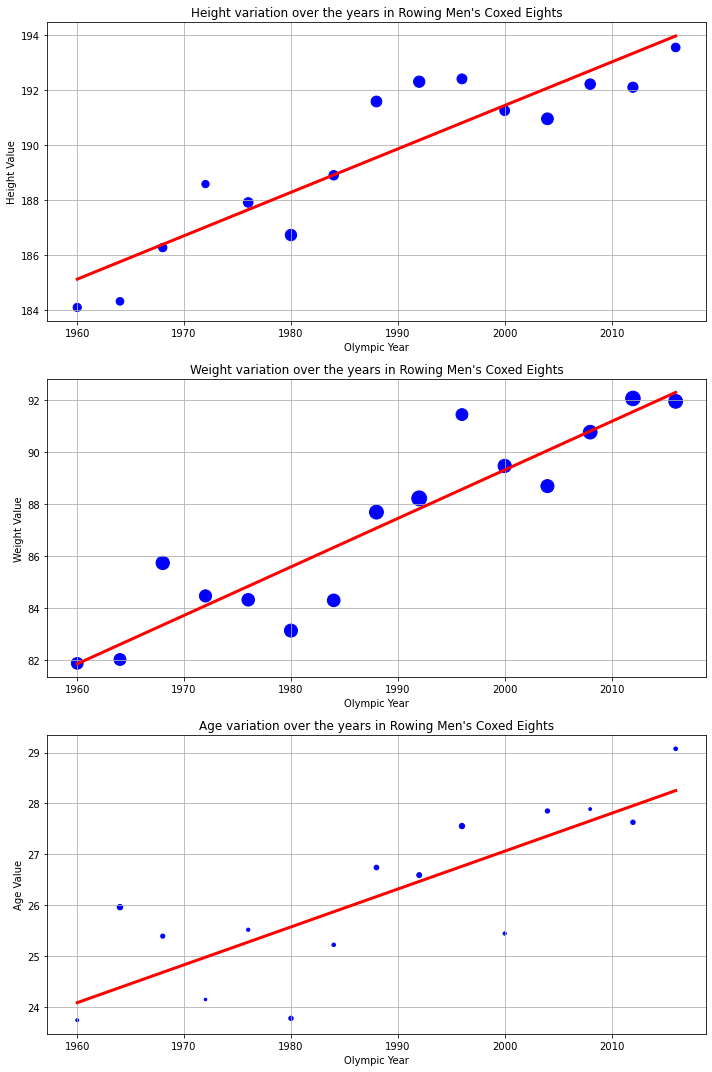

In [17]:
features = ["Height","Weight","Age"]
Event = "Rowing Men's Coxed Eights"
Sex = "M"
Season = "Summer"
Sport = "Rowing"
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, p in enumerate(features):
    print(p)
    data, f = medal_feature(sport = Sport ,event = Event  ,sex = Sex, season = Season ,feature = p ,data= df_clean)
    x, y_true, y_pred, err, r_square = regression_sport(data,f)
    axs[i].scatter(x, y_true, err, c = 'blue')
    axs[i].plot(x, y_pred, linewidth=3, markersize=12, c = 'red')
    axs[i].set_xlabel("Olympic Year")
    axs[i].set_ylabel(str(p)+ " Value")
    axs[i].set_title(str(p) + " variation over the years in " + str(Event))
    fig.tight_layout()
    axs[i].grid()


#### 6.3 Alpine Skiing Women's Slalom

Height
----------------------------------------
Regression features:
Slope: 0.20
Intercept: -228.26
R_square: 0.55
----------------------------------------
Weight
----------------------------------------
Regression features:
Slope: 0.30
Intercept: -524.75
R_square: 0.55
----------------------------------------
Age
----------------------------------------
Regression features:
Slope: 0.10
Intercept: -171.92
R_square: 0.66
----------------------------------------


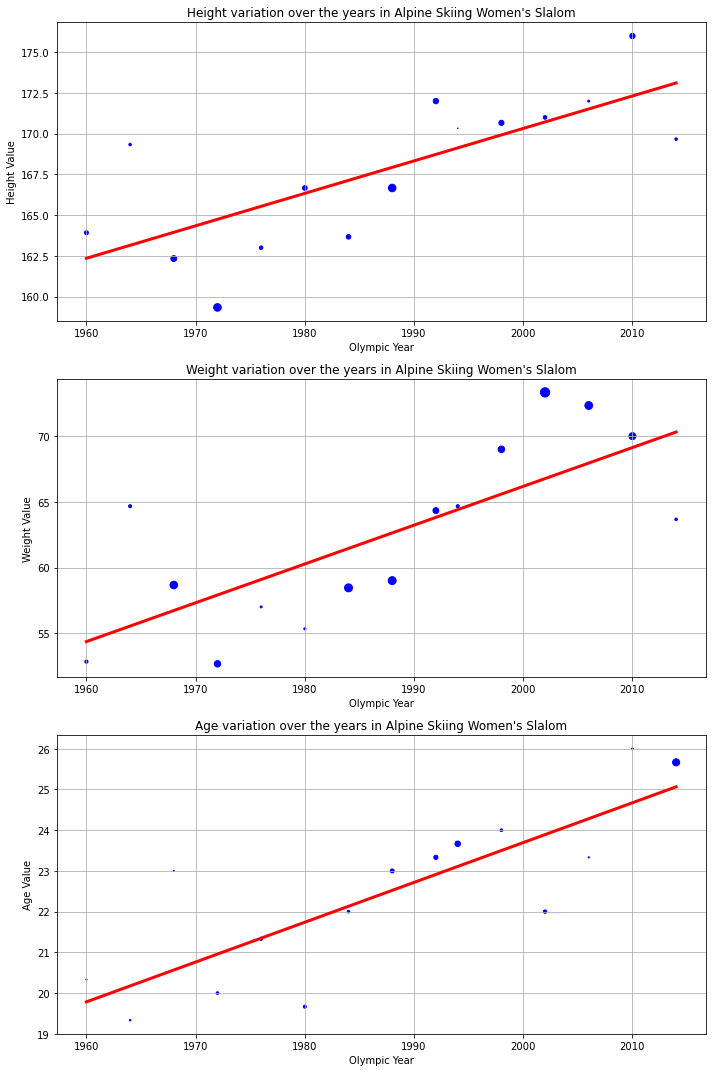

In [18]:
features = ["Height","Weight","Age"]
Event = "Alpine Skiing Women's Slalom"
Sex = "F"
Season = "Winter"
Sport = "Alpine Skiing"
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, p in enumerate(features):
    print(p)
    data, f = medal_feature(sport = Sport ,event = Event  ,sex = Sex, season = Season ,feature = p ,data= df_clean)
    x, y_true, y_pred, err, r_square = regression_sport(data,f)
    axs[i].scatter(x, y_true, err, c = 'blue')
    axs[i].plot(x, y_pred, linewidth=3, markersize=12, c = 'red')
    axs[i].set_xlabel("Olympic Year")
    axs[i].set_ylabel(str(p)+ " Value")
    axs[i].set_title(str(p) + " variation over the years in " + str(Event))
    fig.tight_layout()
    axs[i].grid()

#### 6.4 Swimming Women's 4 x 100 metres Freestyle Relay

Height
----------------------------------------
Regression features:
Slope: 0.19
Intercept: -205.02
R_square: 0.78
----------------------------------------
Weight
----------------------------------------
Regression features:
Slope: 0.11
Intercept: -145.75
R_square: 0.54
----------------------------------------
Age
----------------------------------------
Regression features:
Slope: 0.13
Intercept: -239.81
R_square: 0.83
----------------------------------------


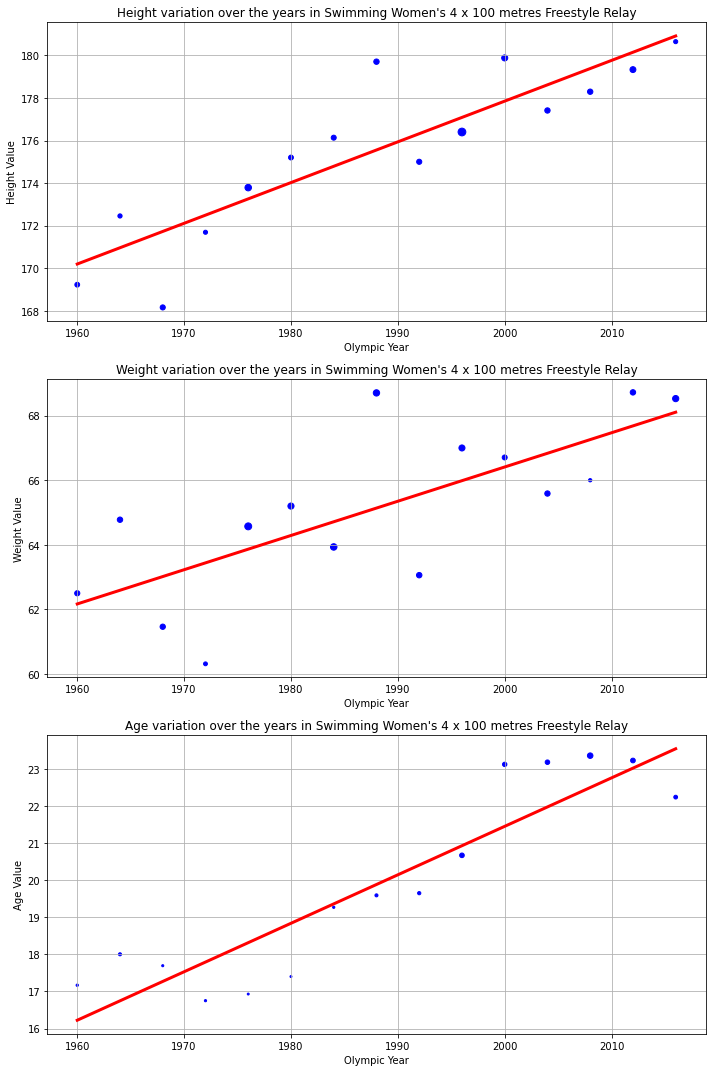

In [19]:
features = ["Height","Weight","Age"]
Event = "Swimming Women's 4 x 100 metres Freestyle Relay"
Sex = "F"
Season = "Summer"
Sport = "Swimming"
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, p in enumerate(features):
    print(p)
    data, f = medal_feature(sport = Sport ,event = Event  ,sex = Sex, season = Season ,feature = p ,data= df_clean)
    x, y_true, y_pred, err, r_square = regression_sport(data,f)
    axs[i].scatter(x, y_true, err, c = 'blue')
    axs[i].plot(x, y_pred, linewidth=3, markersize=12, c = 'red')
    axs[i].set_xlabel("Olympic Year")
    axs[i].set_ylabel(str(p)+ " Value")
    axs[i].set_title(str(p) + " variation over the years in " + str(Event))
    fig.tight_layout()
    axs[i].grid()

The sports have been chosen in such a way as to highlight some models in which linear regression works well, but in other cases, we see how the small excursion of values along the y-axes highlights that we do not have a linear trend. 

## 7. Who will be the winning athlete of 2050?

In [20]:
"""
Winning athlete of 2050 in Swimming Women's 4 x 100 metres Freestyle Relay
Height, Weight, Age
"""
slope_h = 0.20
intercept_h = -216.00
slope_w = 0.12
intercept_w = -164.96
slope_a = 0.13
intercept_a = -239.81

year = 2050

height =  slope_h*year + intercept_h
weight =  slope_w*year + intercept_w
age =  slope_a*year + intercept_a
print('---------------------------------------------------------------------------------------')
print("Winning athlete of 2050 in Swimming Women's 4 x 100 metres Freestyle Relay should have:")
print("Height(cm): {:.2f}".format(round(height, 2)))
print("Weight(Kg): {:.2f}".format(round(weight, 2)))
print("Age: {:.2f}".format(round(age, 2)))
print('---------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------
Winning athlete of 2050 in Swimming Women's 4 x 100 metres Freestyle Relay should have:
Height(cm): 194.00
Weight(Kg): 81.04
Age: 26.69
---------------------------------------------------------------------------------------


In [21]:
"""
Winning athlete of 2050 in Swimming Men's 4 x 100 metres Medley Relay
Height, Weight, Age
"""
slope_h = 0.16
intercept_h = -127.21
slope_w = 0.22
intercept_w = -350.94
slope_a = 0.08
intercept_a = -137.27

year = 2050

height =  slope_h*year + intercept_h
weight =  slope_w*year + intercept_w
age =  slope_a*year + intercept_a
print('---------------------------------------------------------------------------------------')
print("Winning athlete of 2050 in Swimming Men's 4 x 100 metres Medley Relay would have:")
print("Height(cm): {:.2f}".format(round(height, 2)))
print("Weight(Kg): {:.2f}".format(round(weight, 2)))
print("Age: {:.2f}".format(round(age, 2)))
print('---------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------
Winning athlete of 2050 in Swimming Men's 4 x 100 metres Medley Relay would have:
Height(cm): 200.79
Weight(Kg): 100.06
Age: 26.73
---------------------------------------------------------------------------------------


These two examples were given to show that linear regression can be very useful in some cases to highlight the trend of certain phenomena. 
For example in the case of the Swimming Women's 4 x 100 metres Freestyle Relay, we had a good $R^2$ index for weight, height and age. 
This showed that, in this case, the model was able to predict the trend for the features considered. 
In ice hockey, for instance, despite the good $R^2$ the prediction was not entirely accurate.
In that case, for example, an athlete in 2050 would be 190 cm in height, 150 kg in weight and about 39 years old. 
This shows that regression is very sensitive to fluctuations and that such a long-term prediction does not always make sense. We must also point out that in swimming this type of model gives fairly faithful results and allows us to predict an athlete with a good chance.
Finally, one of the limitations of regression is that it does not take the human limit into account. 
That is to say, in situations in which there was an upward trend in certain factors such as height or weight, the prediction returned values for height, weight and age that were very unlikely among Olympic athletes. 
Generally, these were quite isolated cases but noteworthy. 
It was possible to see that in swimming, where better results are generally obtained, the result was comparable with the physical characteristics of some contemporary athletes. 